## 2lvl or 3lvl Buck or Buckboost Power Dissapation

In [ ]:
# use modified cyntec model, which simplifies input parameter dependent variables
# added nxTON DCM calculation

#### to do:
1. verify ciss,coss and crss models vs. datasheet graphs
2. add self heating to mosfets
3. set up jupyter server for public use
4. create gui front end
5. add features to excel export function 

In [1]:
import libs.append_path
from add_python_libraries import *
import pd_filter_fcns

from bucklosses_dcm import Buckconverter_losses

from multiparam_multivar_generic import Multiparam_multivar_df as mp_mv_df

### Input Parameters

In [ ]:
# input_params = {'vin': 20,
#                 'vout': 11.1,
#                 'pin': 100, #21.5, #30.6,
#                 'eff': .97, #.95,
#                 'fs':375e3,
#                 'ton_mult':1,
#                 'tambient':25,
#                 'controller':'raa489300',
#                 #'r_shunt_input':0.010,
#                 'lout':{'family':'hbed053t',
#                         'value(uH)':0.33,
#                         'config':'single'},
#                 'lvl_config':'3 level',
#                 'hsfet_partnum':'SIZF5302DT', #'SISH536DN',   #'ISZ0702NLS',#'SIRA74DP',#'SIRA74DP','BSC059N04LS6',#'BSZ063N04LS6',#'SIR426DP',#'SIS488DN',#'SIRA74DP',#'SIS488DN',#'AONS66408',#'AONR66406',#'SIS488DN',#'SISS4410DN',#'SISA14DN',##'SISS4410DN',#'BSC059N04LS6', #'SIS488DN''SIR426DP'
#                 'lsfet_partnum':'SIZF5300DT', #'SISS52DN',   #'BSZ024N04LS6',#'SISA72ADN',#'SISA72ADN',#'AONS66408',#'SISS4410DN',#'SIRA74DP', #'AONS66408',#'BSC059N04LS6',#'BSZ024N04LS6',#'SIRA74DP',
#                 'q4_partnum':'SHORT',       #'BSC020N03MSG',#'BSC020N03MSG',#'SIRA74DP',#,'AON7318',#'AONR36368',#'AON7318',#'SISA14DN',#'SISA14DN', #'SHORT', #'SISS52DN',
#                 'vgate':10,
#                 'rboot':5,
#                 'm_hs':1,
#                 'm_ls':1,
#                 'rd':0.5,
#                 'caps':{'vin'   :{'partnum':'GRM32EC72A106KE05L','n':4},
#                         'vout'  :{'partnum':'GRM32EC72A106KE05L','n':8},
#                         'flying':{'partnum':'C2012X5R1H106K125AC','n':8}}
#                }
# input_params['iout'] = input_params['pin']*input_params['eff']/input_params['vout']

In [ ]:
# input_params = {'vin': 11.4,
#                 'vout': 4.2,
#                 'pin': 1.3, #21.5, #30.6,
#                 'eff': .97, #.95,
#                 'fs':300e3,
#                 'ton_mult':1,
#                 'tambient':25,
#                 'controller':'raa489300',
#                 #'r_shunt_input':0.010,
#                 'lout':{'family':'hbed053t',
#                         'value(uH)':0.47,
#                         'config':'single'},
#                 'lvl_config':'3 level',
#                 'hsfet_partnum':'SIZF5302DT', #'SISH536DN',   #'ISZ0702NLS',#'SIRA74DP',#'SIRA74DP','BSC059N04LS6',#'BSZ063N04LS6',#'SIR426DP',#'SIS488DN',#'SIRA74DP',#'SIS488DN',#'AONS66408',#'AONR66406',#'SIS488DN',#'SISS4410DN',#'SISA14DN',##'SISS4410DN',#'BSC059N04LS6', #'SIS488DN''SIR426DP'
#                 'lsfet_partnum':'SIZF5300DT',#'SIZF5300DT', #'SISS52DN',   #'BSZ024N04LS6',#'SISA72ADN',#'SISA72ADN',#'AONS66408',#'SISS4410DN',#'SIRA74DP', #'AONS66408',#'BSC059N04LS6',#'BSZ024N04LS6',#'SIRA74DP',
#                 'q4_partnum':'SHORT', #'SIZF5300DT',#'SHORT',       #'BSC020N03MSG',#'BSC020N03MSG',#'SIRA74DP',#,'AON7318',#'AONR36368',#'AON7318',#'SISA14DN',#'SISA14DN', #'SHORT', #'SISS52DN',
#                 'vgate':5,
#                 'rboot':1,
#                 'm_hs':1,
#                 'm_ls':1,
#                 'rd':0.5,
#                 'caps':{'vin'   :{'partnum':'GRM32EC72A106KE05L','n':4},
#                         'vout'  :{'partnum':'GRM32EC72A106KE05L','n':8},
#                         'flying':{'partnum':'C2012X5R1H106K125AC','n':8}}
#                }
# input_params['iout'] = input_params['pin']*input_params['eff']/input_params['vout']

In [ ]:
# input_params = {'vin': 28,
#                 'vout': 4.2,
#                 'pin': 1.3, #21.5, #30.6,
#                 'eff': .97, #.95,
#                 'fs':300e3,
#                 'ton_mult':1,
#                 'tambient':25,
#                 'controller':'raa489300',
#                 #'r_shunt_input':0.010,
#                 'lout':{'family':'hbed053t',
#                         'value(uH)':0.47,
#                         'config':'single'},
#                 'lvl_config':'3 level',
#                 'hsfet_partnum':'SIZF5302DT', #'SISH536DN',   #'ISZ0702NLS',#'SIRA74DP',#'SIRA74DP','BSC059N04LS6',#'BSZ063N04LS6',#'SIR426DP',#'SIS488DN',#'SIRA74DP',#'SIS488DN',#'AONS66408',#'AONR66406',#'SIS488DN',#'SISS4410DN',#'SISA14DN',##'SISS4410DN',#'BSC059N04LS6', #'SIS488DN''SIR426DP'
#                 'lsfet_partnum':'SIZF5300DT',#'SIZF5300DT', #'SISS52DN',   #'BSZ024N04LS6',#'SISA72ADN',#'SISA72ADN',#'AONS66408',#'SISS4410DN',#'SIRA74DP', #'AONS66408',#'BSC059N04LS6',#'BSZ024N04LS6',#'SIRA74DP',
#                 'q4_partnum':'SHORT', #'SIZF5300DT',#'SHORT',       #'BSC020N03MSG',#'BSC020N03MSG',#'SIRA74DP',#,'AON7318',#'AONR36368',#'AON7318',#'SISA14DN',#'SISA14DN', #'SHORT', #'SISS52DN',
#                 'vgate':5,
#                 'rboot':1,
#                 'm_hs':1,
#                 'm_ls':1,
#                 'rd':0.5,
#                 'caps':{'vin'   :{'partnum':'GRM32EC72A106KE05L','n':4},
#                         'vout'  :{'partnum':'GRM32EC72A106KE05L','n':8},
#                         'flying':{'partnum':'C2012X5R1H106K125AC','n':8}}
#                }
# input_params['iout'] = input_params['pin']*input_params['eff']/input_params['vout']

In [ ]:
# input_params = {'vin': 48,
#                 'vout': 20,
#                 'pin': 280, #21.5, #30.6,
#                 'eff': .98, #.95,
#                 'fs':320e3,
#                 'tambient':45,
#                 'controller':'raa489300',
#                 #'r_shunt_input':0.010,
#                 'lout':{'family':'cmll063t',
#                         'value(uH)':0.68,
#                         'config':'single'},
#                 'lvl_config':'3 level',
#                 'hsfet_partnum':'ISZ0702NLS', #'SISH536DN',   #'ISZ0702NLS',#'SIRA74DP',#'SIRA74DP','BSC059N04LS6',#'BSZ063N04LS6',#'SIR426DP',#'SIS488DN',#'SIRA74DP',#'SIS488DN',#'AONS66408',#'AONR66406',#'SIS488DN',#'SISS4410DN',#'SISA14DN',##'SISS4410DN',#'BSC059N04LS6', #'SIS488DN''SIR426DP'
#                 'lsfet_partnum':'BSZ024N04LS6',#'SISS52DN',   #'BSZ024N04LS6',#'SISA72ADN',#'SISA72ADN',#'AONS66408',#'SISS4410DN',#'SIRA74DP', #'AONS66408',#'BSC059N04LS6',#'BSZ024N04LS6',#'SIRA74DP',
#                 'q4_partnum':'SHORT',       #'BSC020N03MSG',#'BSC020N03MSG',#'SIRA74DP',#,'AON7318',#'AONR36368',#'AON7318',#'SISA14DN',#'SISA14DN', #'SHORT', #'SISS52DN',
#                 'vgate':10,
#                 'rboot':3,
#                 'm_hs':1,
#                 'm_ls':1,
#                 'rd':0.5,
#                 'caps':{'vin'   :{'partnum':'GRM32EC72A106KE05L','n':4},
#                         'vout'  :{'partnum':'GRM32EC72A106KE05L','n':8},
#                         'flying':{'partnum':'C2012X5R1H106K125AC','n':8}}
#                }
# input_params['iout'] = input_params['pin']*input_params['eff']/input_params['vout']

In [ ]:
input_params = {'vin': 28,
                'vout': 9, #9,
                'pin': 165,
                'eff': 1,
                'fs':300e3, #318e3,   #839k,723k,635k carova at inductor
                'ton_mult':1,
                'tambient':60,
                'controller':'raa489300',
                'r_shunt_input':0.010,
                'rboot':1,
                'lout':{'family':'hbed053t', #'ihlp5050ez01', #'hbed053t',
                        'value(uH)':0.47, #1.0,
                        'config':'single'},
                'lvl_config':'3 level',
                'hsfet_partnum':'AONR36368',#'SISH536DN', #'BSZ024N04LS6',#'SISH536DN', #'ISZ0702NLS',#'SIRA74DP',#'SIRA74DP','BSC059N04LS6',#'BSZ063N04LS6',#'SIR426DP',#'SIS488DN',#'SIRA74DP',#'SIS488DN',#'AONS66408',#'AONR66406',#'SIS488DN',#'SISS4410DN',#'SISA14DN',##'SISS4410DN',#'BSC059N04LS6', #'SIS488DN''SIR426DP'
                'lsfet_partnum':'SISS54DN',#'BSZ024N04LS6',#'SISA72ADN',#'SISA72ADN',#'AONS66408',#'SISS4410DN',#'SIRA74DP', #'AONS66408',#'BSC059N04LS6',#'BSZ024N04LS6',#'SIRA74DP',
                'q4_partnum':'SHORT',#'SISS52DN',#'AON6314', #'SHORT', #'BSC020N03MSG',#'BSC020N03MSG',#'SIRA74DP',#,'AON7318',#'AONR36368',#'AON7318',#'SISA14DN',#'SISA14DN', #'SHORT', #'SISS52DN',
                'vgate':10,
                'm_hs':1,
                'm_ls':1,
                'rd':0.5,
                'caps':{'vin'   :{'partnum':'GRM32EC72A106KE05L','n':4},
                        'vout'  :{'partnum':'GRM32EC72A106KE05L','n':8},
                        'flying':{'partnum':'C2012X5R1H106K125AC','n':8}}
               }
input_params['iout'] = input_params['pin']*input_params['eff']/input_params['vout']

In [30]:
input_params = {'vin': 28,
                'vout': 9, #9,
                'pin': 164,
                'eff': 1,
                'fs':300e3, #318e3,   #839k,723k,635k carova at inductor
                'ton_mult':1,
                'tambient':35,
                'controller':'raa489300',
                'r_shunt_input':0.010,
                'rboot':1,
                'lout':{'family':'cmll063t', #'hbed053t', #'cmll063t', #'hbed053t', #'ihlp5050ez01', #'hbed053t',
                        'value(uH)':0.4, #1.0,
                        'config':'single'},
                'lvl_config':'3 level',
                'hsfet_partnum':'SIRA74DP',#'ISC046N04NM5','SISH536DN', #'SIRA12DDP',#'SISH536DN',#'SIZ342',#'SISH536DN', #'BSZ024N04LS6',#'SISH536DN', #'ISZ0702NLS',#'SIRA74DP',#'SIRA74DP','BSC059N04LS6',#'BSZ063N04LS6',#'SIR426DP',#'SIS488DN',#'SIRA74DP',#'SIS488DN',#'AONS66408',#'AONR66406',#'SIS488DN',#'SISS4410DN',#'SISA14DN',##'SISS4410DN',#'BSC059N04LS6', #'SIS488DN''SIR426DP'
                'lsfet_partnum':'SISS54DN',#'BSZ024N04LS6',#'SISA72ADN',#'SISA72ADN',#'AONS66408',#'SISS4410DN',#'SIRA74DP', #'AONS66408',#'BSC059N04LS6',#'BSZ024N04LS6',#'SIRA74DP',
                'q4_partnum':'AON6314', #'SHORT',#'SISS52DN',#'AON6314', #'SHORT', #'BSC020N03MSG',#'BSC020N03MSG',#'SIRA74DP',#,'AON7318',#'AONR36368',#'AON7318',#'SISA14DN',#'SISA14DN', #'SHORT', #'SISS52DN',
                'vgate':10,
                'm_hs':1,
                'm_ls':1,
                'rd':0.5,
                'caps':{'vin'   :{'partnum':'GRM32EC72A106KE05L','n':4},
                        'vout'  :{'partnum':'GRM32EC72A106KE05L','n':8},
                        'flying':{'partnum':'C2012X5R1H106K125AC','n':8}}
               }
input_params['iout'] = input_params['pin']*input_params['eff']/input_params['vout']

In [ ]:
input_params = {'vin': 28,
                'vout': 12, #9,
                'pin': 165,
                'eff': 1,
                'fs':733e3, #318e3,   #839k,723k,635k carova at inductor
                'ton_mult':1,
                'tambient':45,
                'controller':'raa489110',
                'r_shunt_input':0.010,
                'rboot':0,
                'lout':{'family':'ihlp5050ez01', #'hbed053t',
                        'value(uH)':2.2,
                        'config':'single'},
                'lvl_config':'2 level',
                'hsfet_partnum':'AONS66408',#'BSZ024N04LS6',#'SISH536DN', #'ISZ0702NLS',#'SIRA74DP',#'SIRA74DP','BSC059N04LS6',#'BSZ063N04LS6',#'SIR426DP',#'SIS488DN',#'SIRA74DP',#'SIS488DN',#'AONS66408',#'AONR66406',#'SIS488DN',#'SISS4410DN',#'SISA14DN',##'SISS4410DN',#'BSC059N04LS6', #'SIS488DN''SIR426DP'
                'lsfet_partnum':'AONS66408',#'SISS52DN',#'BSZ024N04LS6',#'SISA72ADN',#'SISA72ADN',#'AONS66408',#'SISS4410DN',#'SIRA74DP', #'AONS66408',#'BSC059N04LS6',#'BSZ024N04LS6',#'SIRA74DP',
                'q4_partnum':'AON6314',#'SHORT', #'BSC020N03MSG',#'BSC020N03MSG',#'SIRA74DP',#,'AON7318',#'AONR36368',#'AON7318',#'SISA14DN',#'SISA14DN', #'SHORT', #'SISS52DN',
                'vgate':5,
                'm_hs':2,
                'm_ls':1,
                'rd':0.5,
                'caps':{'vin'   :{'partnum':'GRM32EC72A106KE05L','n':4},
                        'vout'  :{'partnum':'GRM32EC72A106KE05L','n':8},
                        'flying':{'partnum':'C2012X5R1H106K125AC','n':8}}
               }
input_params['iout'] = input_params['pin']*input_params['eff']/input_params['vout']

## Results

In [31]:
b_loss = Buckconverter_losses(input_params)
b_loss.p_totals#|b_loss.p_summary

{'hs fet': 1.111,
 'ls fet': 0.5588,
 'q4 fet': 0.7981,
 'lout': 1.6024,
 'caps': 0.4581,
 'ic_with_gate': 0.416,
 'total': 7.3202,
 'efficiency': 0.9573,
 'Fs': 600000.0}

In [33]:
input_params['hsfet_partnum']='ISC046N04NM5'

In [34]:
c_loss = Buckconverter_losses(input_params)
c_loss.p_totals

{'hs fet': 1.117,
 'ls fet': 0.5588,
 'q4 fet': 0.7981,
 'lout': 1.6024,
 'caps': 0.4581,
 'ic_with_gate': 0.374,
 'total': 7.2901,
 'efficiency': 0.9574,
 'Fs': 600000.0}

{'hs fet': 1.2196,
 'ls fet': 0.5588,
 'q4 fet': 0.7981,
 'lout': 1.6024,
 'caps': 0.4581,
 'ic_with_gate': 0.374,
 'total': 7.4953,
 'efficiency': 0.9563,
 'Fs': 600000.0}

In [19]:
b_loss.p_summary

{'hs turn-on': 0.002,
 'hs turn-off': 0.688,
 'hs rdson': 0.404,
 'hs ringing': 0.017,
 'hs gate': 0.063,
 'ls rdson': 0.214,
 'ls bd': 0.26,
 'ls ring_qrr': 0.084,
 'ls gate': 0.12,
 'q4_rdson': 0.798,
 'lout rdc+rac': 0.823,
 'lout core': 0.78,
 'flying cap': 0.051,
 'input cap': 0.404,
 'board cu': 0.363,
 'ic': 0.05,
 'inp_shunt': 0.343}

In [22]:
c_loss.p_summary

{'hs turn-on': 0.009,
 'hs turn-off': 0.774,
 'hs rdson': 0.404,
 'hs ringing': 0.033,
 'hs gate': 0.042,
 'ls rdson': 0.214,
 'ls bd': 0.26,
 'ls ring_qrr': 0.084,
 'ls gate': 0.12,
 'q4_rdson': 0.798,
 'lout rdc+rac': 0.823,
 'lout core': 0.78,
 'flying cap': 0.051,
 'input cap': 0.404,
 'board cu': 0.363,
 'ic': 0.05,
 'inp_shunt': 0.343}

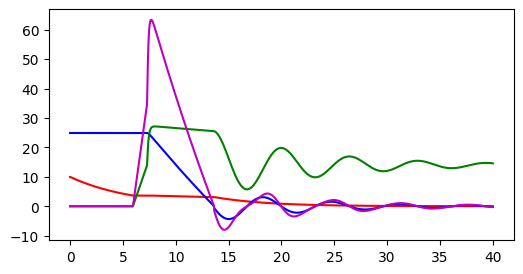

In [35]:
b_loss.hs_Losses_obj.fet_switch_off_obj.plot_vgs_id_vds()

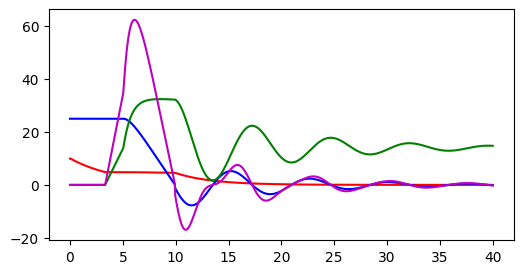

In [36]:
c_loss.hs_Losses_obj.fet_switch_off_obj.plot_vgs_id_vds()

## Multiple Config Comparison

In [ ]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'hsfet_partnum':'ISZ0702NLS',
                 'lsfet_partnum':'SISS52DN'},    
                {'hsfet_partnum':'SISS26LDN',
                 'lsfet_partnum':'SISS4402DN'}])}


In [ ]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'hsfet_partnum':'SISH536DN',
                 'lsfet_partnum':'SISS52DN'},    
                {'hsfet_partnum':'SIZF5302DT',
                 'lsfet_partnum':'SIZF5300DT'}])}


In [ ]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'lout':{'family':'hbed053t',
                        'value(uH)':0.33,
                        'config':'single'}},
                {'lout':{'family':'hbed053t',
                        'value(uH)':0.47,
                        'config':'single'}},
                 {'lout':{'family':'hbed053t',
                        'value(uH)':0.68,
                        'config':'single'}}])}


In [ ]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'ton_mult':0.5},    
                {'ton_mult':1},
                {'ton_mult':1.5},
                {'ton_mult':2}])}


In [ ]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'hsfet_partnum':'SISH536DN',
                 'lsfet_partnum':'SISS54DN'},    
                {'hsfet_partnum':'BSZ024N04LS6',
                 'lsfet_partnum':'SISS52DN'}])}


In [ ]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'lsfet_partnum':'SISS54DN'},    
                {'lsfet_partnum':'SISS52DN'}])}


In [ ]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'hsfet_partnum':'SISH536DN'},    
                {'hsfet_partnum':'AON7318'}])}


In [3]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'hsfet_partnum':'SISH536DN'},    
                {'hsfet_partnum':'AONR36368'}])}


In [ ]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'vin':28,
                 'pin':164,
                 'fs':300e3,
                 'hsfet_partnum':'SISH536DN',
                 'lsfet_partnum':'SISS54DN'},    
                {'vin':32,
                 'pin':159,
                 'fs':300e3,
                 'hsfet_partnum':'SISA72DN',
                 'lsfet_partnum':'SIRA62DDP'},
                {'vin':32,
                 'pin':159,
                 'fs':300e3,
                 'hsfet_partnum':'SIRA74DP',
                 'lsfet_partnum':'SIRA62DDP'}])}


In [ ]:
fetlist_30V_3x3 = ['SISH536DN',
 'SIZ350',
 'SIZ342',
 'SISA14DN',
 'AON7318',
 'AONR36368',
 'SISS66DN',
 'SISS54DN',
 'SISS52DN',
 'SISA12BDN']

In [37]:
fetlist_40V_5x6 = ['AONS66408',
 'BSC032N04LS',
 'ISC036N04NM5',
 'BSC059N04LS6',
 'BSC022N04LS6',
 'ISC046N04NM5',
 'BSC059N04LSG',
 'SIRA74DP']

In [4]:
input_config = {idx+1:{'hsfet_partnum':partnum} for idx,partnum in enumerate(fetlist_40V_5x6)}

In [6]:
iout = [input_params['iout']]
var_list = {'param':'iout','values':iout}

In [38]:
df_all = mp_mv_df(Buckconverter_losses,input_params,input_config,var_list).df
df_all.reset_index(inplace=True)
df_all.drop(['index'],axis=1,inplace=True)


In [39]:
input_config_params = list(input_config[1].keys())
#column_strings = 
lsfet = [param for param in df_all.columns if 'ls ' in param]
hsfet = [param for param in df_all.columns if 'hs ' in param]
lout = [param for param in df_all.columns if 'lout' in param]

xtra_columns = hsfet #+ ['ls fet'] + lout #hsfet# + lsfet
concise_column_list = ['config'] + input_config_params + xtra_columns +['total','efficiency']

In [ ]:
df_all.columns

In [40]:
df_all.filter(concise_column_list).sort_values(by="hs fet")

,config,hsfet_partnum,hs turn-on,hs turn-off,hs rdson,hs ringing,hs gate,hs fet,total,efficiency
0,config1,AONS66408,0.001,0.826,0.300,0.025,0.087,1.1521,7.4503,0.9565
4,config5,BSC022N04LS6,0.003,0.964,0.208,0.024,0.066,1.1996,7.5033,0.9562
5,config6,ISC046N04NM5,0.009,0.774,0.404,0.033,0.042,1.2196,7.4953,0.9563
7,config8,SIRA74DP,0.002,0.829,0.404,0.014,0.063,1.2488,7.5957,0.9557
2,config3,ISC036N04NM5,0.020,0.892,0.312,0.041,0.057,1.2651,7.6164,0.9556
1,config2,BSC032N04LS,0.003,0.992,0.289,0.020,0.060,1.3023,7.6968,0.9552
3,config4,BSC059N04LS6,0.001,0.804,0.543,0.010,0.022,1.3578,7.7318,0.9550
6,config7,BSC059N04LSG,0.004,0.830,0.566,0.022,0.072,1.4216,7.9593,0.9537


In [ ]:
df_all.to_csv(r'sim_results\165W_28Vin_10Vout_multipleconfigs_100523.csv')

In [ ]:
df_all

In [ ]:
df = pd.DataFrame.from_dict(b_loss.p_summary| b_loss.p_totals,orient='index',columns=[b_loss.idc])
df.T